# Telco Churn Analysis

# # Importing the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the file

telco_data = pd.read_csv('Telcom-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_data.shape

(7043, 21)

In [4]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#Checking the data types

telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Check the descriptive statistics of numeric variables

telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior Citizen is actually a categorical, hence the 25%-50%-75% distirbution is not proper

75% customers have tenure less that 55 months

Average monthly charges are USD 64.76, whereas 25% of customers pay more than USD 89.85 per month

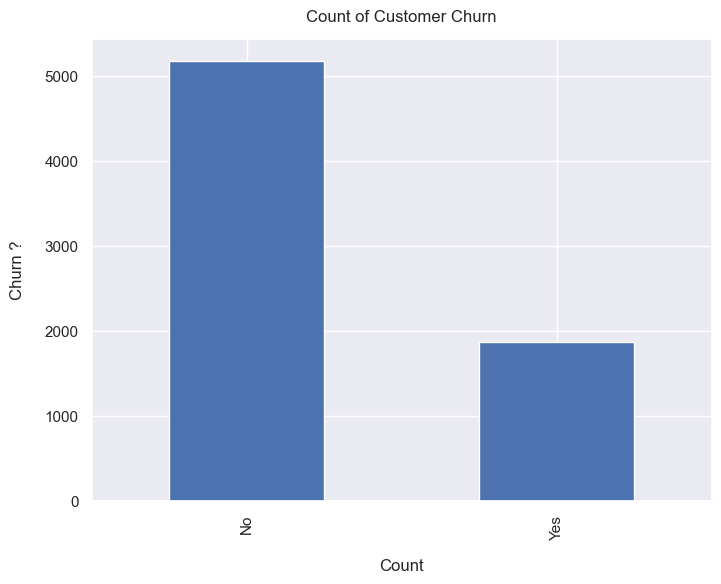

In [7]:
telco_data ['Churn'].value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Churn ?',labelpad=14)
plt.title('Count of Customer Churn',y=1.02)
plt.show()

In [8]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [9]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalanced, ratio being 73:27, so we analyse the data with other features while taking the target values
separately to get some insights.

In [10]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Missing Values

Here, we dont have any missing data.

General thumb rules:

1. If there are less number of missing values, we can use regression to predict missing values or do the imputation according 
to the type of features.
2. If there are more number of missing values, it is better to drop those, as they give very less insights on analysis.
3. As there is no thumb rule on what criteria to delete the columns with high number of missing values, but generally we can 
delete the columns having more than 25% threshold, after discussing with the stakeholders or SMEs.

#  Data Cleaning

1. Create a copy of original data for manipualtion and processing

In [12]:
telco_data1 = telco_data.copy()

2. Total charges should be numeric amount.Convert it into numerical data type

In [13]:
telco_data1.TotalCharges = pd.to_numeric(telco_data1.TotalCharges, errors = 'coerce')
telco_data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see, there are 11 missing values in 'TotalCharges' column . Checking for these recors

In [14]:
telco_data1.loc[telco_data1['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Since the percentage of these records compared to the total dataset is very low ie 0.15%, it is safe to ignore them 
for further processing

In [15]:
#Removing missing values

telco_data1.dropna(how='any', inplace = True)

telco_data1.fillna(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


5. Divide customers into bins based on tenure, eg, for tenure < 12 months: assign a tenure group if 1-12 months,for tenure 
between 1 to 2 years, tenure group of 13-14 years and so on.

In [16]:
#Getting the max tenure

print(telco_data1['tenure'].max())

72


In [17]:
#Grouping the tenure in bins for 12 months

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data1['tenure_group'] = pd.cut(telco_data1.tenure, range(1, 80, 12), right = False, labels = labels)


In [18]:
telco_data1['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

6. Remove columns that are not required for processing

In [19]:
# Dropping the columns 'CustomerId' and 'tenure'

telco_data1.drop(columns = ['customerID','tenure'], axis = 1, inplace = True)
telco_data1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Exploratory Data Analysis

**1.** Plot distribution of individual predictors by churn

# Univariate Analysis

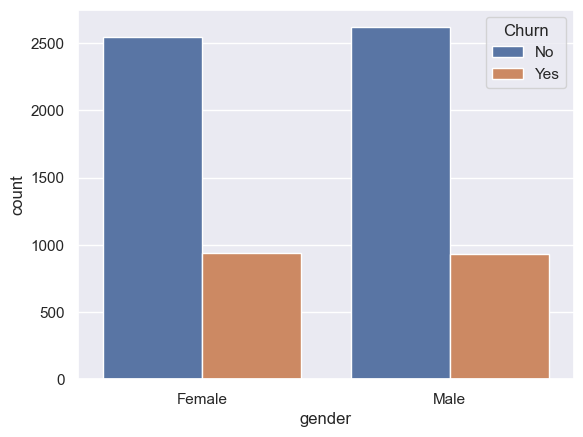

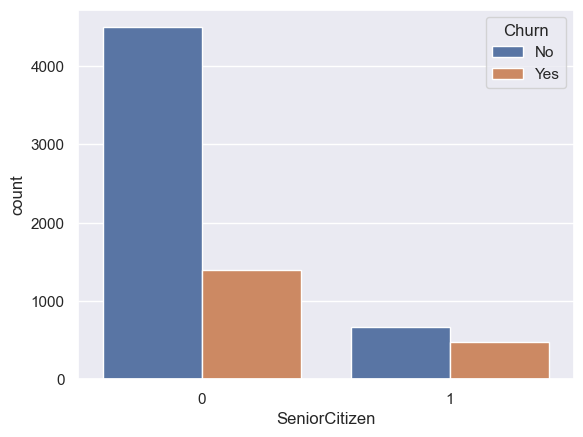

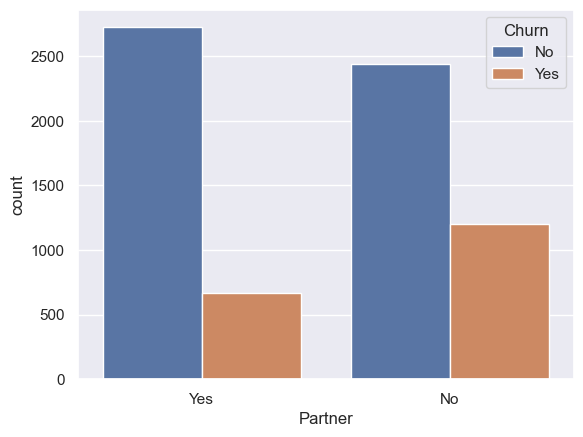

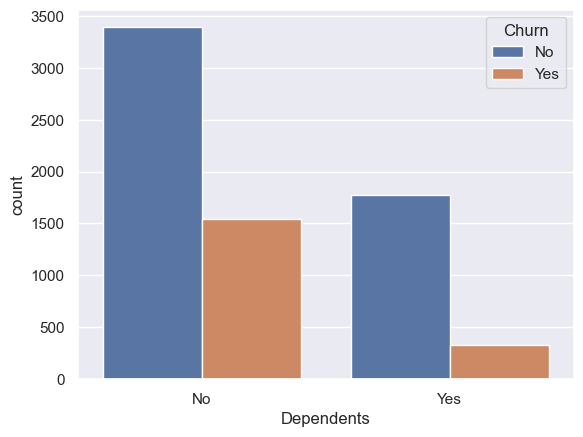

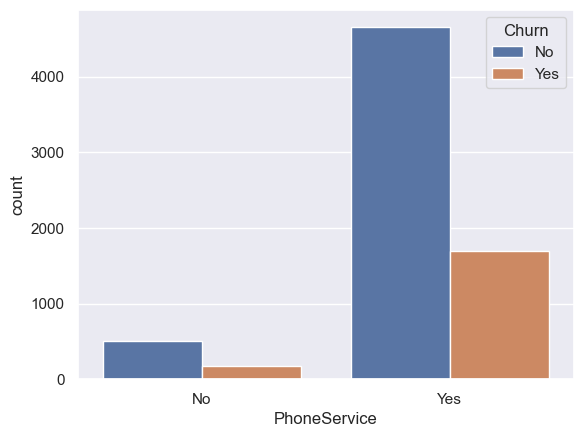

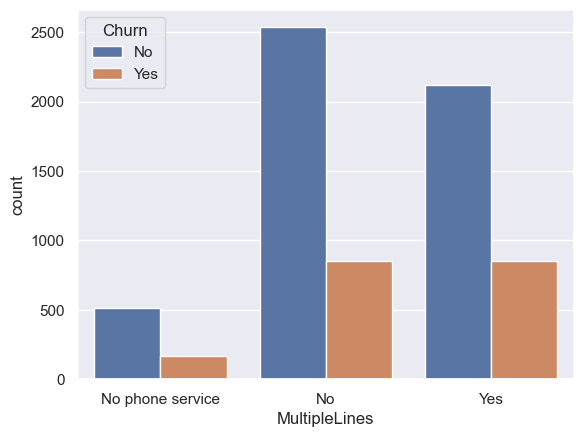

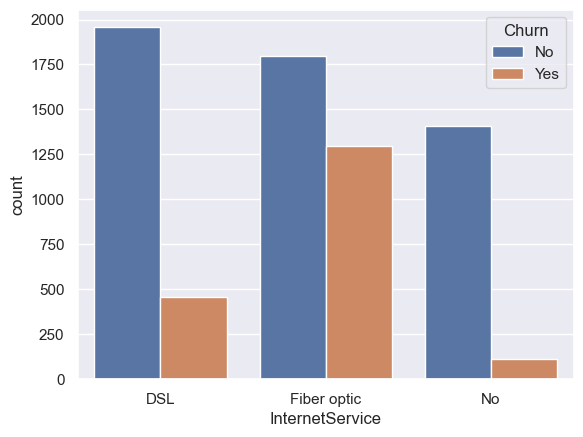

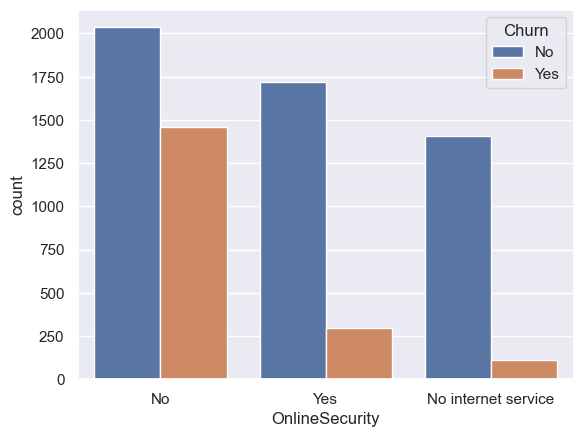

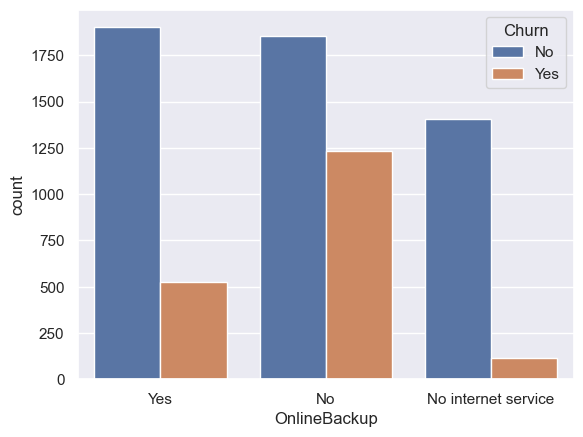

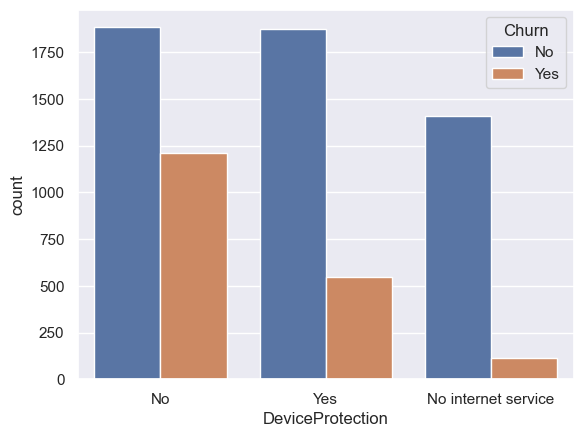

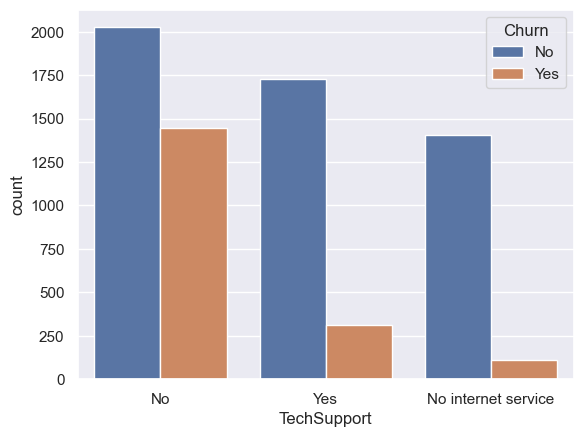

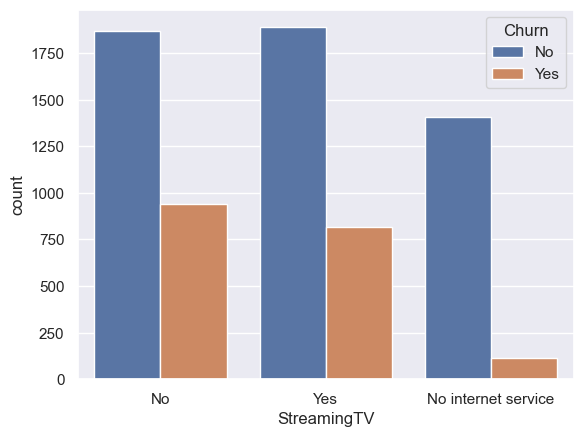

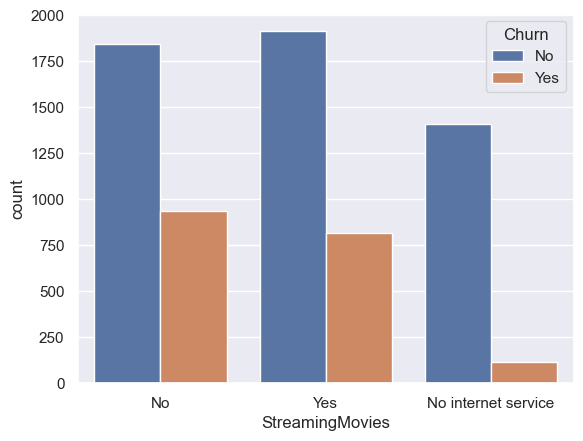

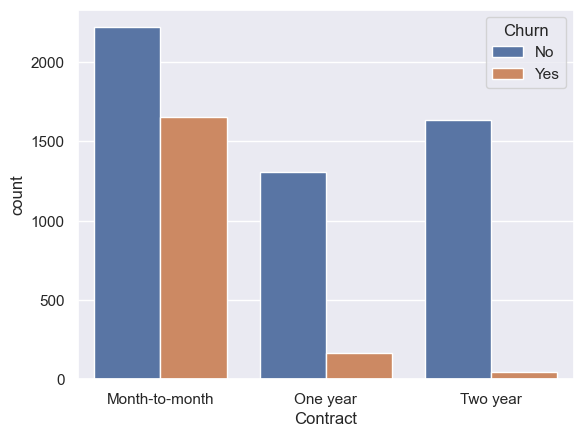

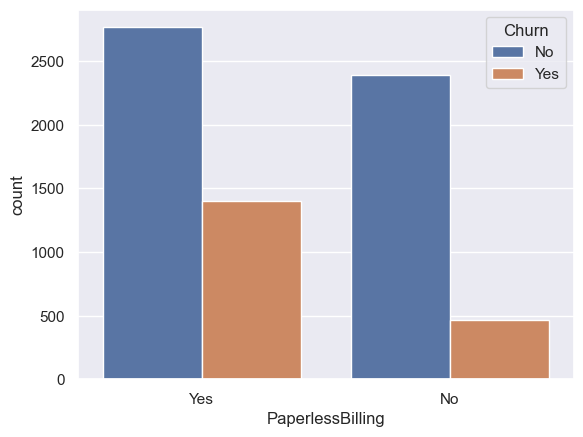

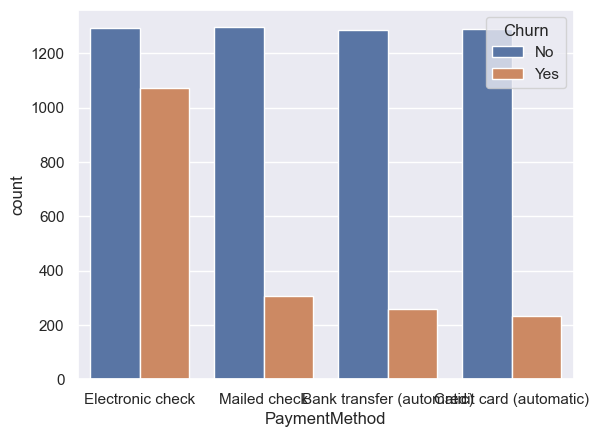

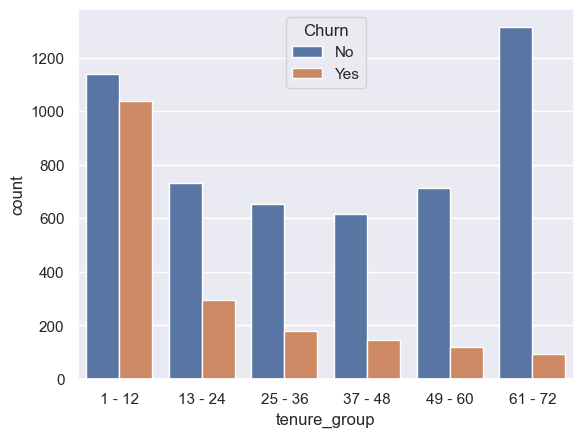

In [20]:
for i, predictor in enumerate(telco_data1.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = telco_data1, x = predictor, hue = 'Churn')
    plt.show()

2. Convert the target variable 'Churn' into a binary numeric variable i.e Yes=1; No=0

In [21]:
telco_data1['Churn'] = np.where(telco_data1.Churn == 'Yes',1,0)

In [22]:
telco_data1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


# Encoding

3. Converting all the categorical variables into dummy variables

In [23]:
telco_data1_dummies = pd.get_dummies(telco_data1)
telco_data1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

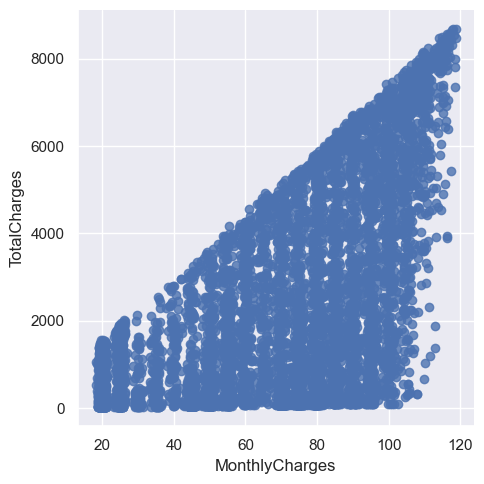

In [24]:
sns.lmplot(data = telco_data1_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False)

Here, we can see Total Charges increases as Monthly Charges increase.-As expected

# Churn by Monthly Charges and Total charges

Text(0.5, 1.0, 'Monthly Charges by Churn')

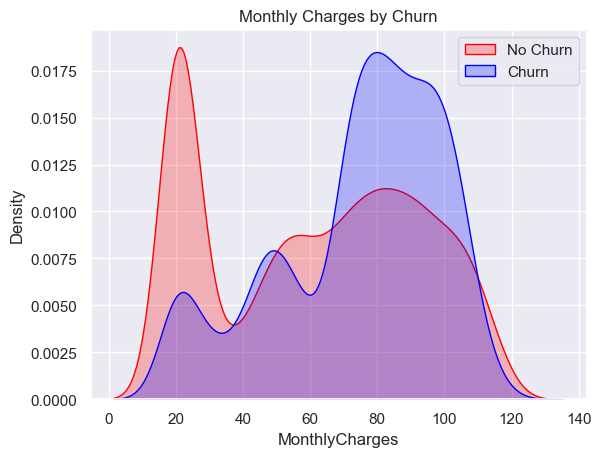

In [25]:
Mth = sns.kdeplot(telco_data1_dummies.MonthlyCharges[(telco_data1_dummies['Churn'] == 0)],
                 color = 'Red', shade = True)
Mth = sns.kdeplot(telco_data1_dummies.MonthlyCharges[(telco_data1_dummies['Churn'] == 1)],
                 ax = Mth, color = 'Blue', shade = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('MonthlyCharges')
Mth.set_title('Monthly Charges by Churn')

Text(0.5, 1.0, 'Total Charges by Churn')

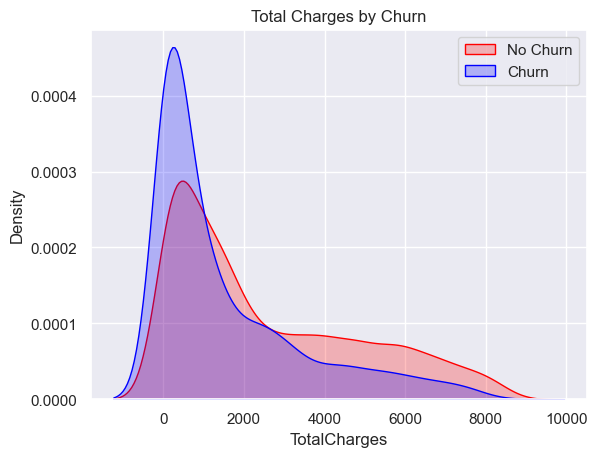

In [26]:
Mth = sns.kdeplot(telco_data1_dummies.TotalCharges[(telco_data1_dummies['Churn'] == 0)],
                 color = 'Red', shade = True)
Mth = sns.kdeplot(telco_data1_dummies.TotalCharges[(telco_data1_dummies['Churn'] == 1)],
                 ax = Mth, color = 'Blue', shade = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('TotalCharges')
Mth.set_title('Total Charges by Churn')

**Surprising Insight** as higher turn at lower Total Charges

However, if we combine the insights of 3 parameters i.e Tenure, Monthly Charges, and Total Charges, then the picture gets bit
clear:-
    Higher Monthly Charges at lower tenure results into lower Total charge.Hence, all these 3 factors viz Higher Monthly Charge,
    Lower tenure and lower tenure charge are linked to High Churn.   

<Axes: >

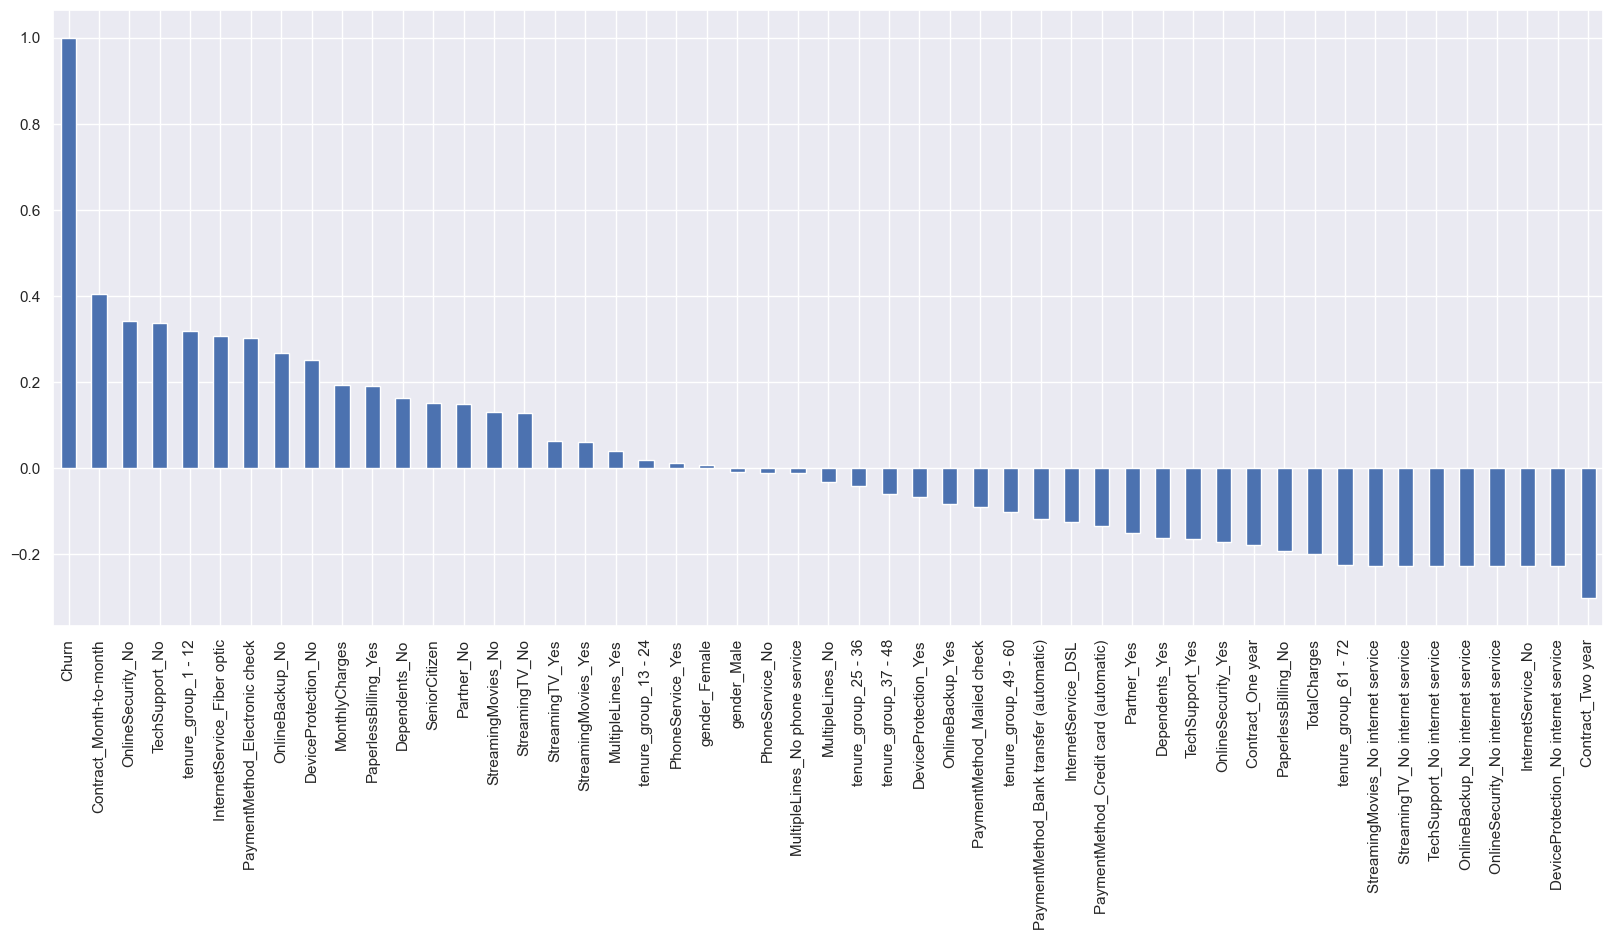

In [27]:
# Building Correlation of all predictors with 'Churn'

plt.figure(figsize=(20,8))
telco_data1_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

**Derived Insights:**

High Churns seen in cases of Month to Month contracts,No online security,No tech support,First year of subsription and Fibre 
optics internet

Low Churn seen in cases of Long term contracts, subscrptions without internet service and the customers engaged for 5+ years

Factors like Gender, availability of PhoneService and  of multiple lines have almost No impact on Churn

This is also evident from the heatmap below

<Axes: >

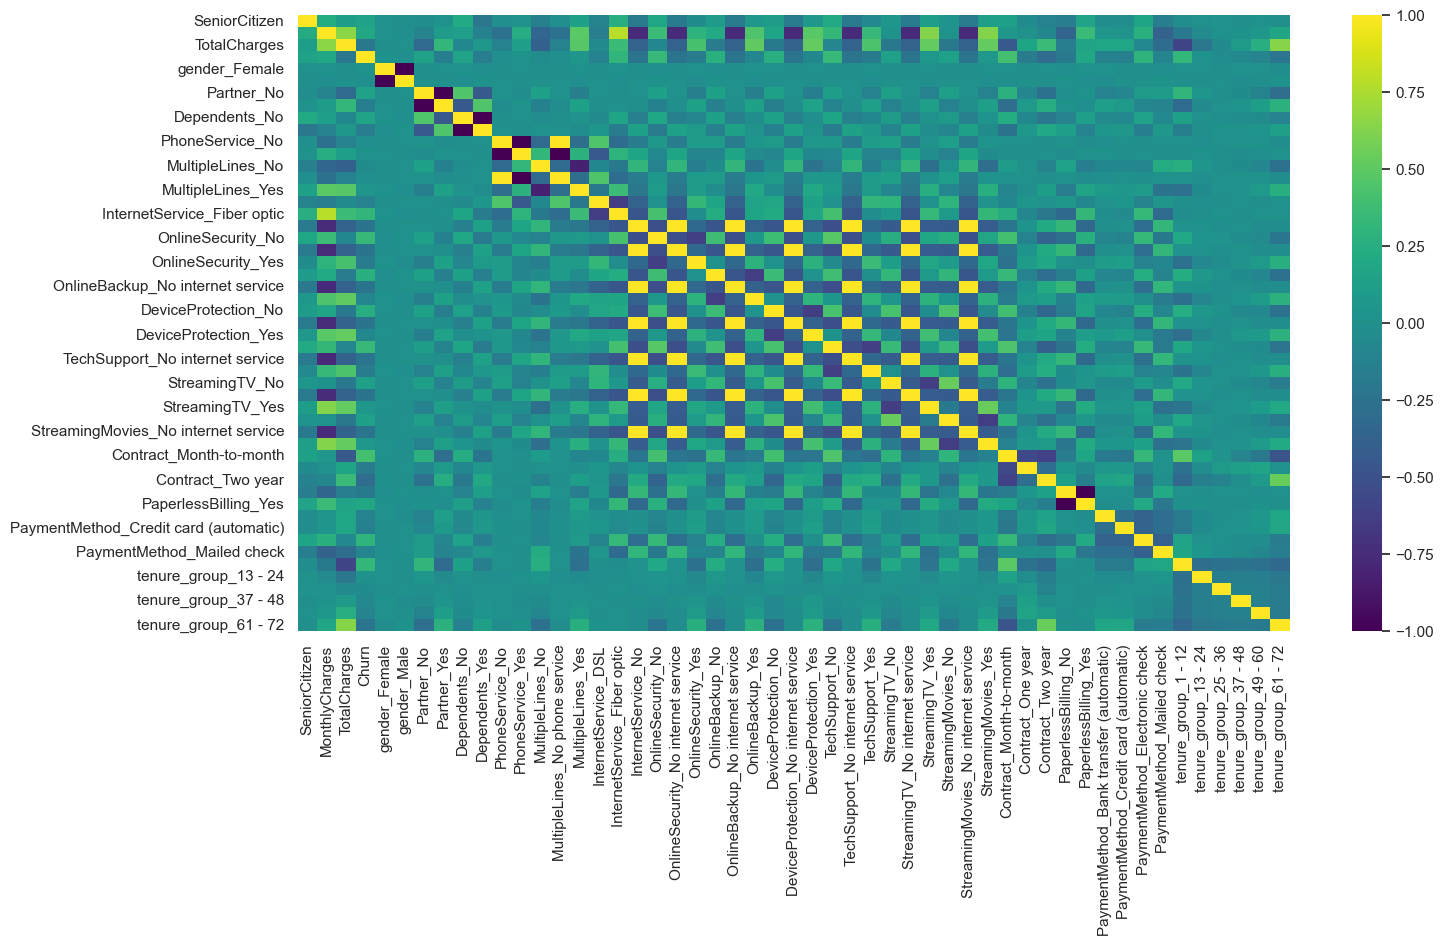

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(telco_data1_dummies.corr(),cmap = 'viridis')

# Bivariate Analysis

In [29]:
new_df1_target0 = telco_data1.loc[telco_data1['Churn']==0]
new_df1_target1 = telco_data1.loc[telco_data1['Churn']==1]

In [30]:
def uniplot (df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette = 'bright')
    
    plt.show()

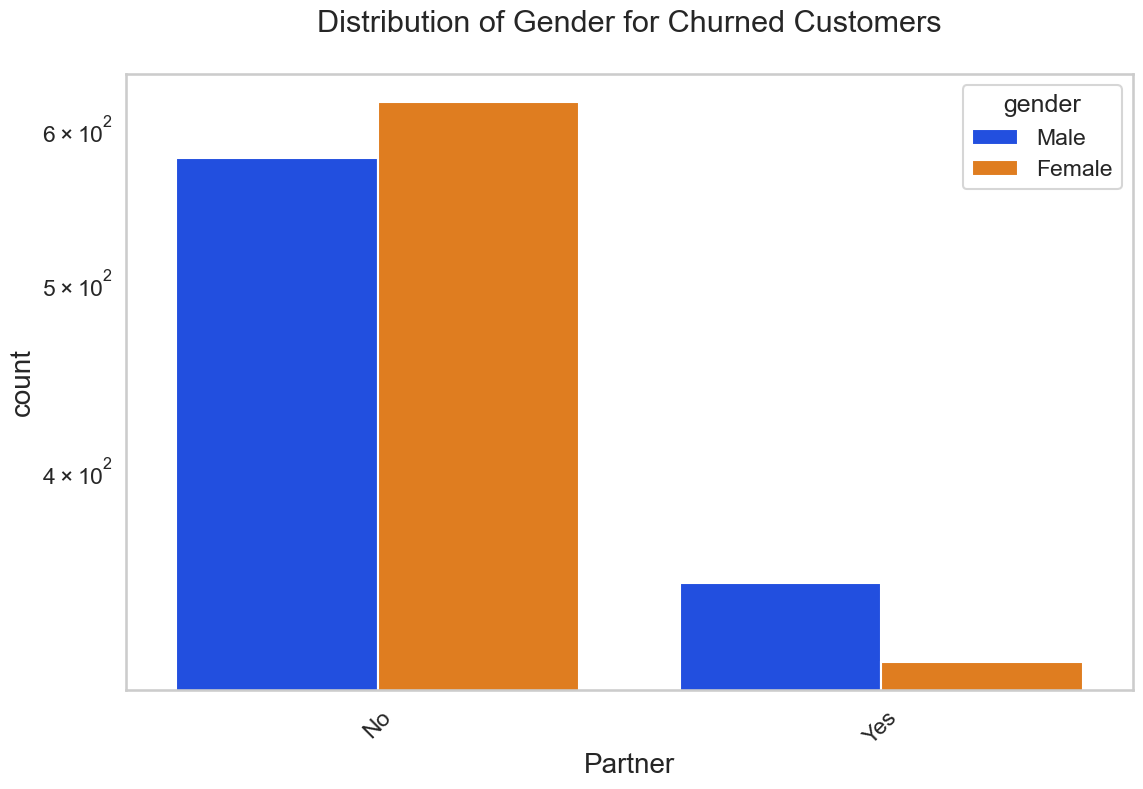

In [31]:
uniplot(new_df1_target1, col = 'Partner', title = 'Distribution of Gender for Churned Customers', hue ='gender')

<Figure size 600x600 with 0 Axes>

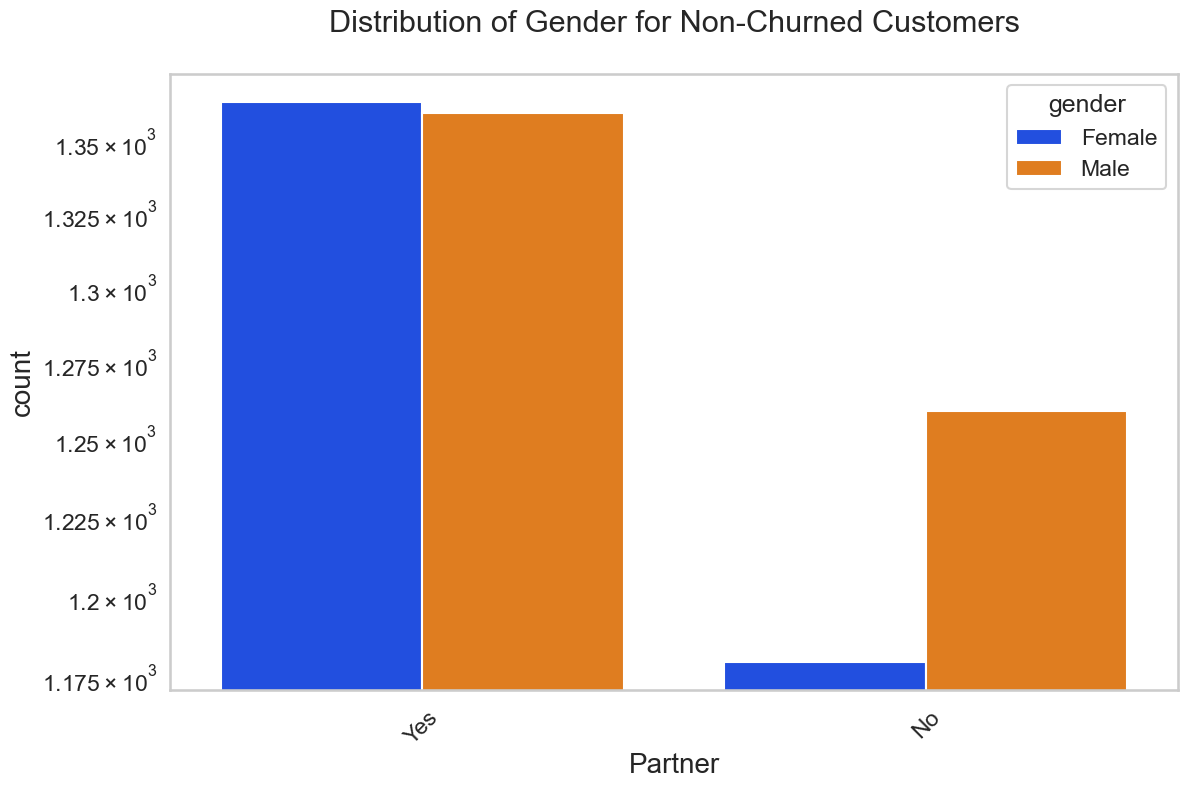

In [32]:
plt.figure(figsize=(6,6))
uniplot(new_df1_target0, col = 'Partner', title = 'Distribution of Gender for Non-Churned Customers', hue ='gender')

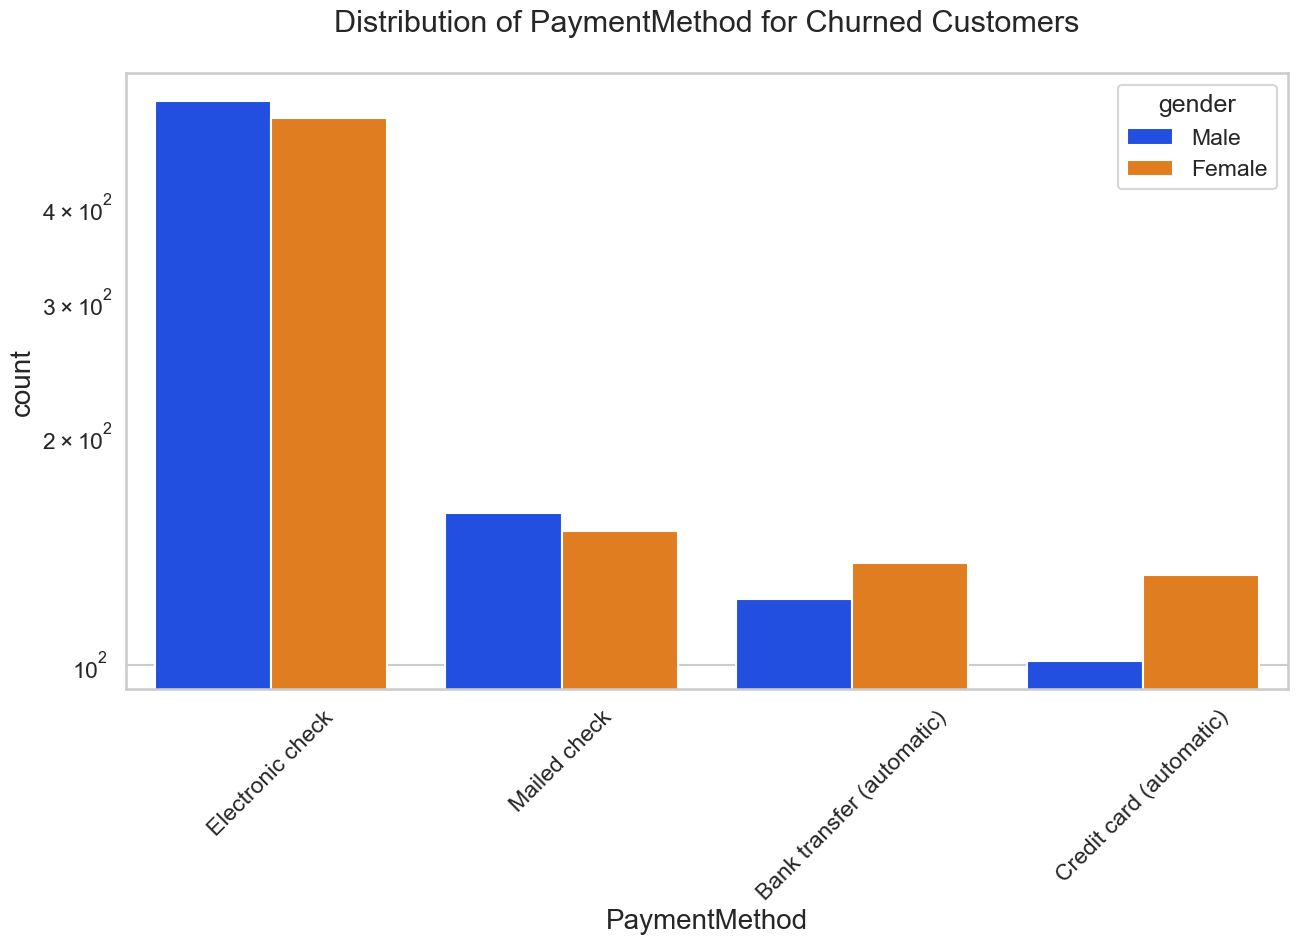

In [33]:
uniplot(new_df1_target1, col = 'PaymentMethod', title = 'Distribution of PaymentMethod for Churned Customers', hue ='gender')

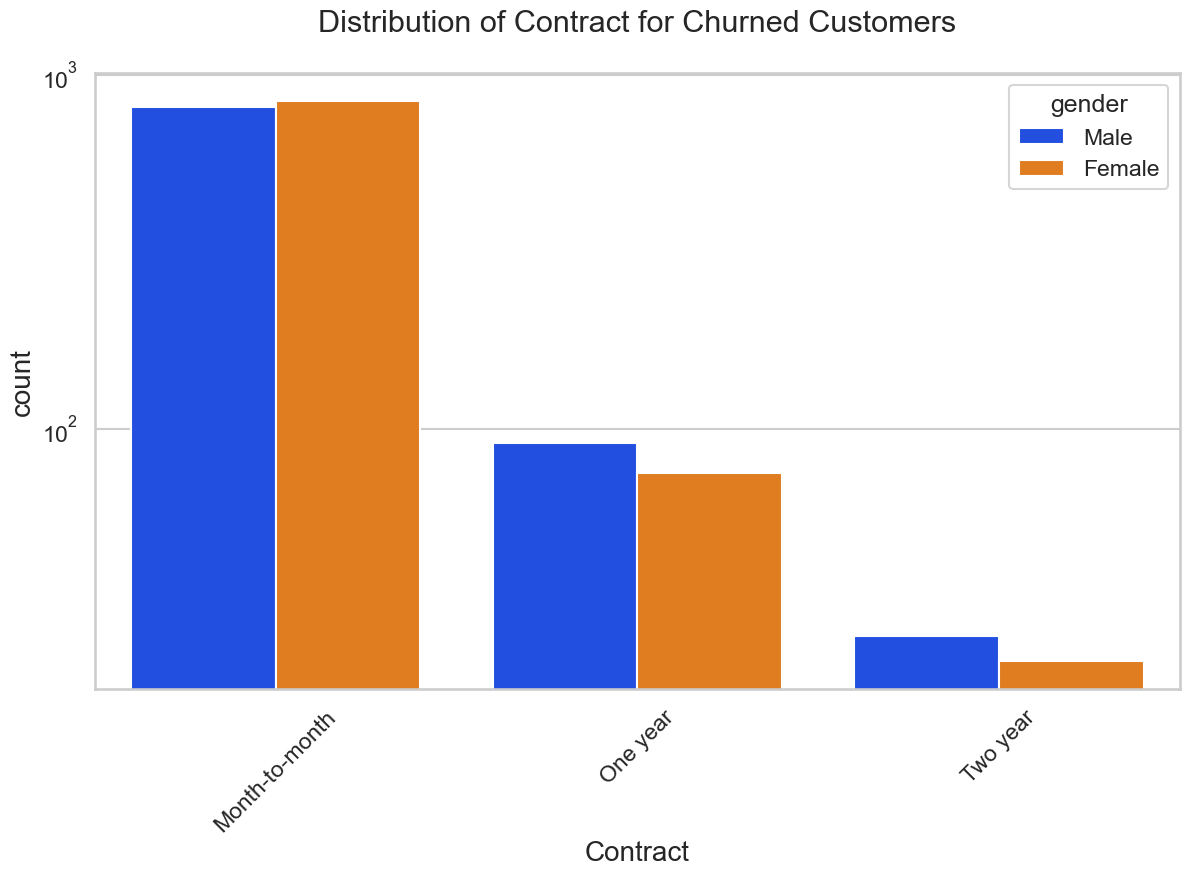

In [34]:
uniplot(new_df1_target1, col = 'Contract', title = 'Distribution of Contract for Churned Customers', hue ='gender')

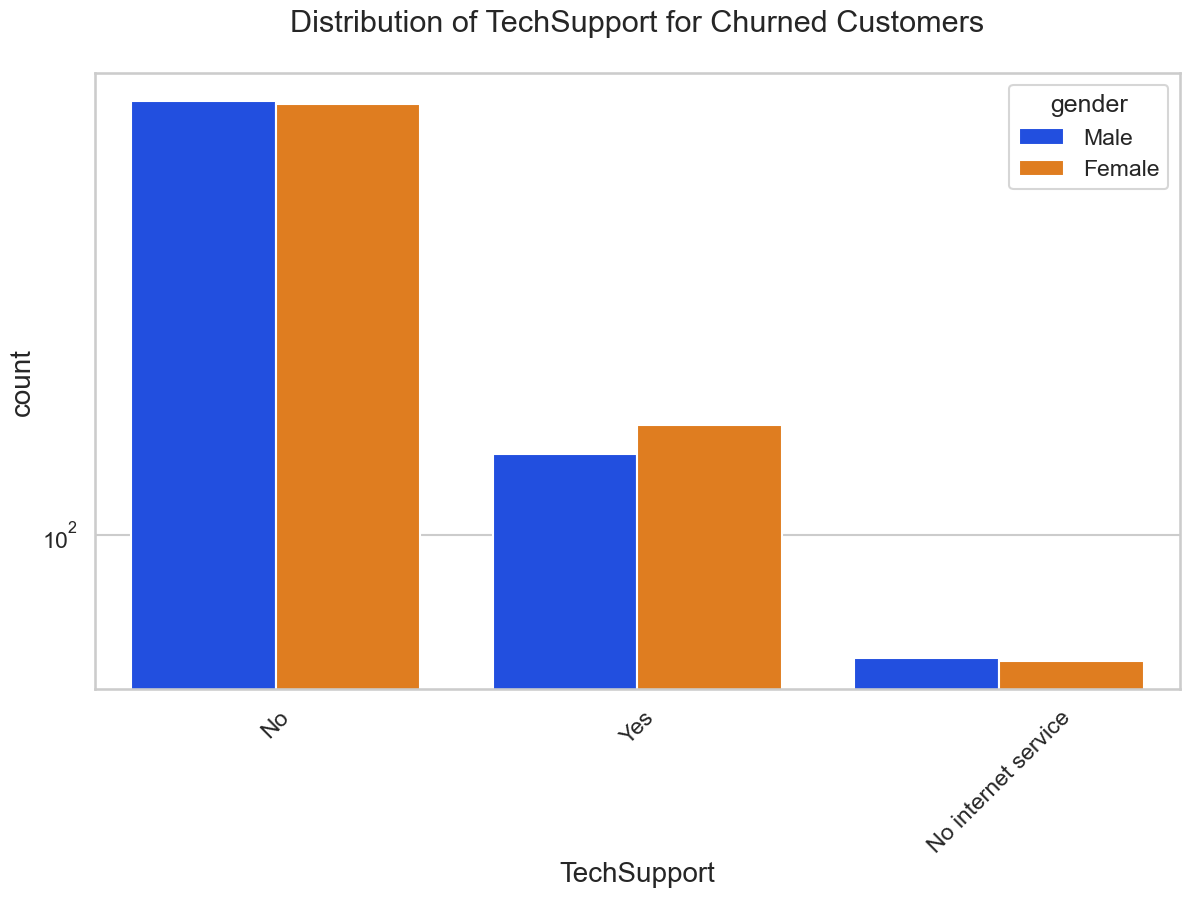

In [35]:
uniplot(new_df1_target1, col = 'TechSupport', title = 'Distribution of TechSupport for Churned Customers', hue ='gender')

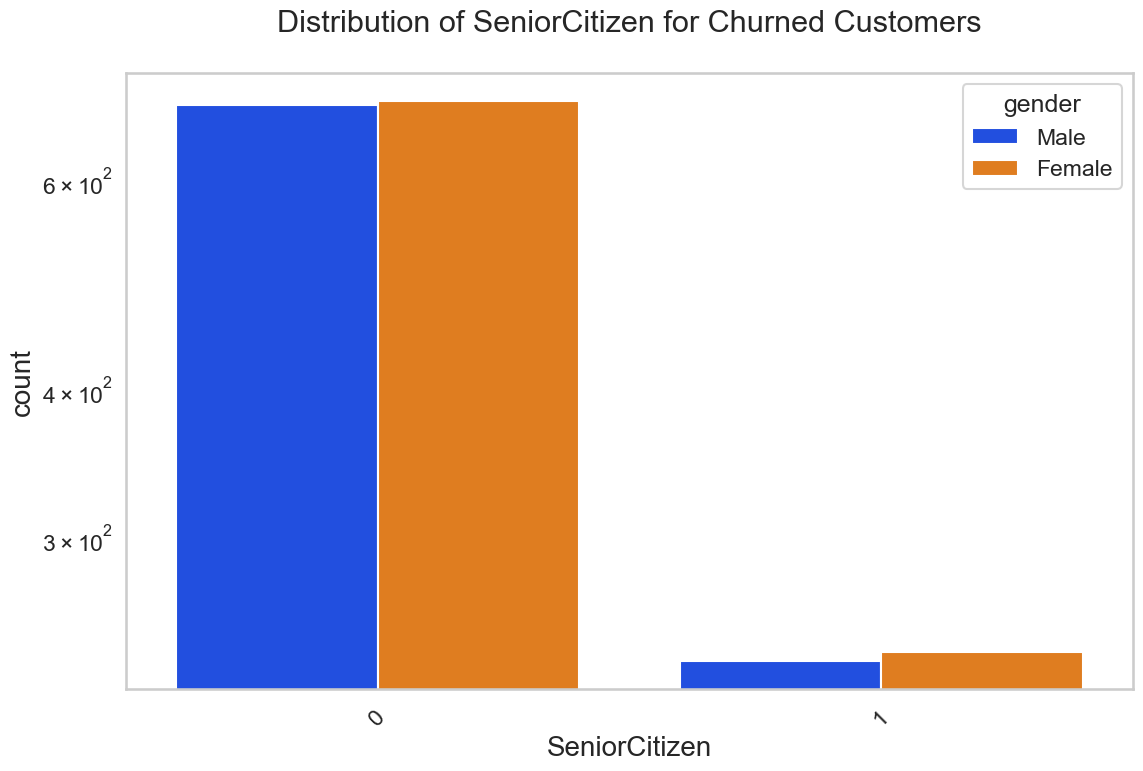

In [36]:
uniplot(new_df1_target1, col = 'SeniorCitizen', title = 'Distribution of SeniorCitizen for Churned Customers', hue ='gender')

# Conclusion

These are some quick insights from the above exploratory analysis;

1. Electronic check mediums are the highest chuners.
2. Contract type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No online security, and No tech support categories are high churners.
4. Non-Senior Citizens are high churners.

In [37]:
# Saving 

telco_data1_dummies.to_csv('Customer_Churn_analysis.csv')